# Assignment - 2 
### Rool.no:22229

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [10]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [13]:
train_loader = DataLoader(dataset=training_data,batch_size=64,shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64,shuffle=False)

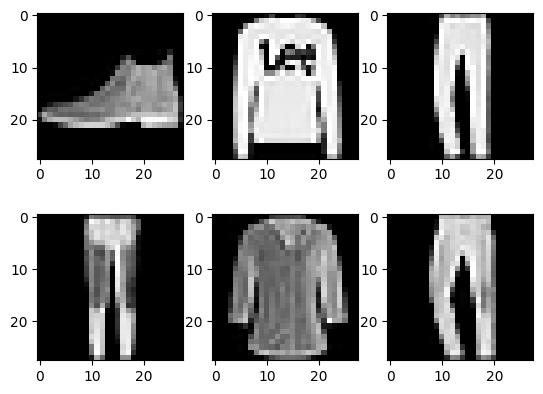

In [16]:
examples = next(iter(test_loader))
example_data, example_targets = examples
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [25]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(28 * 28, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.softmax(self.linear3(x), dim=1)
        return x


In [28]:
model = SimpleNeuralNetwork()


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [33]:
epochs = 10
n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28)
        labels = labels

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 2.3008
Epoch [1/5], Step [200/938], Loss: 2.3016
Epoch [1/5], Step [300/938], Loss: 2.3004
Epoch [1/5], Step [400/938], Loss: 2.2993
Epoch [1/5], Step [500/938], Loss: 2.2970
Epoch [1/5], Step [600/938], Loss: 2.2983
Epoch [1/5], Step [700/938], Loss: 2.2988
Epoch [1/5], Step [800/938], Loss: 2.2973
Epoch [1/5], Step [900/938], Loss: 2.2956
Epoch [2/5], Step [100/938], Loss: 2.2952
Epoch [2/5], Step [200/938], Loss: 2.2912
Epoch [2/5], Step [300/938], Loss: 2.2923
Epoch [2/5], Step [400/938], Loss: 2.2887
Epoch [2/5], Step [500/938], Loss: 2.2849
Epoch [2/5], Step [600/938], Loss: 2.2862
Epoch [2/5], Step [700/938], Loss: 2.2848
Epoch [2/5], Step [800/938], Loss: 2.2810
Epoch [2/5], Step [900/938], Loss: 2.2700
Epoch [3/5], Step [100/938], Loss: 2.2630
Epoch [3/5], Step [200/938], Loss: 2.2490
Epoch [3/5], Step [300/938], Loss: 2.2221
Epoch [3/5], Step [400/938], Loss: 2.2370
Epoch [3/5], Step [500/938], Loss: 2.2584
Epoch [3/5], Step [600/938], Loss:

In [36]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network o: {acc} %')

Accuracy of the network o: 65.28 %
